In [1]:
import numpy as np
import matplotlib.pyplot as plt

import firedrake
import icepack

import os
os.environ["OMP_NUM_THREADS"] = "1"

ModuleNotFoundError: No module named 'firedrake'

## IceStratigraphy model

#### Four key operations:
1. ***Mutate:*** add, remove, or edit layers  
    a. Layers will be added at the base of the column.  
    b. Layers will be removed from the base of the column.  
    c. Layer values may be edited anywhere within the column.  
    
2. ***Deform:*** change the thickness of the column  
    a. Thickness will be a scalar tracer attached to each column.  
    b. We assume that a change in total column thickness translates to a similar change in each layer's thickness.      
  
3. ***Advect:*** move columns within the flow field  
    a. Columns must be able to be reduced to Nd vectors.  
    b. All tracers attached to a column must be reduceable to scalar values. 
    c. Whenever columns are advected, all tracers must advect as well.  
    d. Lemma: Deformation happens gradually w.r.t. grid spacing, such that advection can remain agnostic to difference in layer thicknesses.  
    
4. ***Interpolate:*** translate a 2d velocity vector into N 2d vectors for N layers  
    a. Lemma: sliding velocity equals surface velocity minus deformation velocity.  
    b. Lemma: The vertical variation in horizontal velocity is modeled by a quartic polynomial:  
$$ (u_s - u_b)\left[1 - (1 - \zeta)^4\right] + u_b $$  

In [12]:
class IceStrat:
    
    def __init__(self, mesh, surface_velocity, sliding_velocity, vertical_velocity):
        self.mesh = mesh
        self.surface_velocity = surface_velocity
        self.sliding_velocity = sliding_velocity
        self.vertical_velocity = vertical_velocity
        
        
    def interpolate_layers(self):
        pass
        
    def add_layer(self):
        pass
    
    def remove_layer(self):
        pass
    
    def deform(self):
        pass
    
    def interpolate_velocity(self):
        pass
    
    def advect(self):
        pass
    
    

### Set up mesh and calculate velocity field from SIA

In [9]:
Lx, Ly = 10e3, 1e3
nx, ny = 64, 16
mesh = firedrake.RectangleMesh(nx, ny, Lx, Ly)
Q = firedrake.FunctionSpace(mesh, family = 'CG', degree = 2)
V = firedrake.VectorFunctionSpace(mesh, family = 'CG', degree = 2)
x, y = firedrake.SpatialCoordinate(mesh)

In [10]:
model = icepack.models.ShallowIce()
solver = icepack.solvers.FlowSolver(model)

In [13]:
T = firedrake.Constant(273 - 10)
A = icepack.rate_factor(T)

h_in, h_out = 1000, 100
h0 = firedrake.interpolate(h_in - (h_in - h_out) * x / Lx, Q)
s0 = firedrake.interpolate(h_in - (h_in - h_out) * x / Lx, Q)

In [14]:
u0 = firedrake.Function(V)
h = h0.copy(deepcopy = True)
u = solver.diagnostic_solve(
    velocity = u0, 
    thickness = h, 
    surface = s0, 
    fluidity = A
)

In [47]:
velocity_decay = 0.6
u_b = firedrake.interpolate(u * 0.6, V)

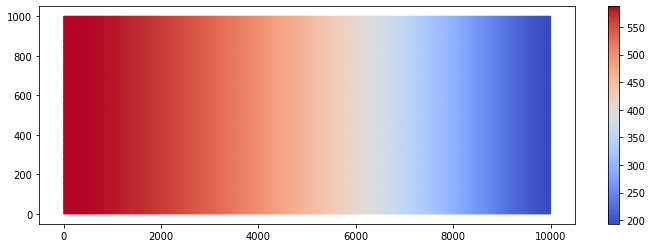

In [21]:
fig, ax = plt.subplots(figsize = (12, 4))
im = firedrake.tripcolor(u_b, cmap = 'coolwarm', axes = ax)
plt.colorbar(im)
plt.show()

In [102]:
# Calculate the polynomial representation of vertical velocity
zs = np.arange(0.000, 500.0, 0.001)
zeta = zs / 500
u_z = (1000 - 550) * (1 - (1 - zeta)**4) + 550

In [103]:
surface = zip(*u.dat.data_ro[:]
u_z = (u - u_b) * (1 - (1 - zeta)**4) + u_b

ValueError: operands could not be broadcast together with shapes (2,) (500000,) 